In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import datetime
import matplotlib.pylab as plt
import plotly.graph_objects as go
from pathlib import Path
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [3]:
cars = pd.read_csv('vehicles.csv')

In [4]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
cars.shape[0]

426880

## Data Cleaning

In [6]:
# drop unnecessary variables: id, url, region_url, VIN, image_url, description, lat, and long
cars = cars.drop(columns = ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long'])

In [7]:
cars.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


In [8]:
# look at the number of NA values by column
cars.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
posting_date        68
dtype: int64

Looking at the above data, I will drop the county, size, condition, cylinders, drive, and paint color variable as the majority of their values are NA.

In [9]:
cars = cars.drop(columns = ['county', 'size', 'condition', 'cylinders', 'drive', 'paint_color'])

In [10]:
cars.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


In [11]:
cars.shape[0]

426880

In [12]:
# drop NA values
cars = cars.dropna()

In [13]:
cars.shape[0]

306976

In [14]:
cars.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,2021-05-03T14:02:03-0500


In [15]:
# convert year and odometer to integer values
cars = cars.astype({'year':'int', 'odometer':'int'})

In [16]:
# create an age variable to get a better understanding of how old a car is
cars['age'] = datetime.date.today().year - cars['year']

In [17]:
cars.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date,age
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,gas,57923,clean,other,pickup,al,2021-05-04T12:31:18-0500,9
28,auburn,22590,2010,chevrolet,silverado 1500,gas,71229,clean,other,pickup,al,2021-05-04T12:31:08-0500,13
29,auburn,39590,2020,chevrolet,silverado 1500 crew,gas,19160,clean,other,pickup,al,2021-05-04T12:31:25-0500,3
30,auburn,30990,2017,toyota,tundra double cab sr,gas,41124,clean,other,pickup,al,2021-05-04T10:41:31-0500,6
31,auburn,15000,2013,ford,f-150 xlt,gas,128000,clean,automatic,truck,al,2021-05-03T14:02:03-0500,10


## Data Exploration

[Text(0.5, 1.0, 'Distribution of Car Ages')]

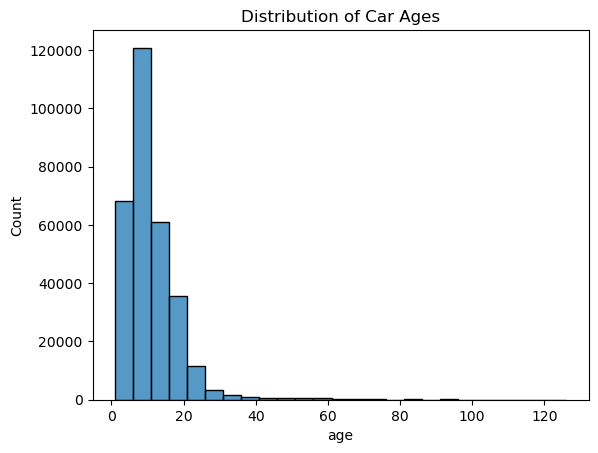

In [18]:
sns.histplot(data = cars, x = 'age', binwidth = 5).set(title = 'Distribution of Car Ages')

In [19]:
cars[cars['year'] < 1990]

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date,age
228,birmingham,5500,1978,ford,f-150,gas,239000,clean,automatic,truck,al,2021-05-03T14:47:14-0500,45
245,birmingham,5500,1974,mercedes-benz,1929 ssk replica,gas,9999,clean,automatic,convertible,al,2021-05-03T09:41:06-0500,49
271,birmingham,19950,1955,chevrolet,bel air,gas,96867,clean,automatic,sedan,al,2021-05-02T16:08:48-0500,68
338,birmingham,4000,1972,mercedes-benz,benz,gas,88100,clean,automatic,coupe,al,2021-05-01T11:33:56-0500,51
437,birmingham,1250,1988,ford,bronco ii,gas,90000,clean,manual,SUV,al,2021-04-29T09:41:32-0500,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426545,wyoming,14000,1977,chevrolet,c20 silverado,gas,86225,clean,automatic,pickup,wy,2021-04-20T09:29:40-0600,46
426649,wyoming,7500,1988,jeep,grand wagoneer,gas,117232,clean,automatic,SUV,wy,2021-04-14T19:21:48-0600,35
426729,wyoming,20000,1951,jeep,cj 3a willys,gas,14409,clean,manual,other,wy,2021-04-10T16:31:26-0600,72
426762,wyoming,7000,1982,mazda,rx& gls sport,gas,80000,clean,automatic,coupe,wy,2021-04-07T19:21:02-0600,41


There are 5,371 cars which were produced before 1990.  These values will be dropped because they will likely skew my models as many cars produced in that era are considered "classic" cars and tend to be worth more now.

In [20]:
cars = cars[cars.year >= 1990]

In [21]:
cars.shape[0]

301605

[Text(0.5, 1.0, 'Distribution of Car Ages')]

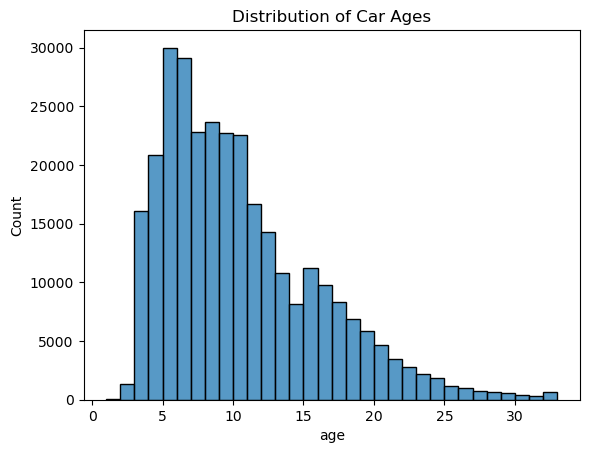

In [22]:
# looking again at the distribution of ages
sns.histplot(data = cars, x = 'age', binwidth = 1).set(title = 'Distribution of Car Ages')

In [23]:
cars.shape[0]

301605

[Text(0.5, 1.0, 'Distribution of Car Odometer')]

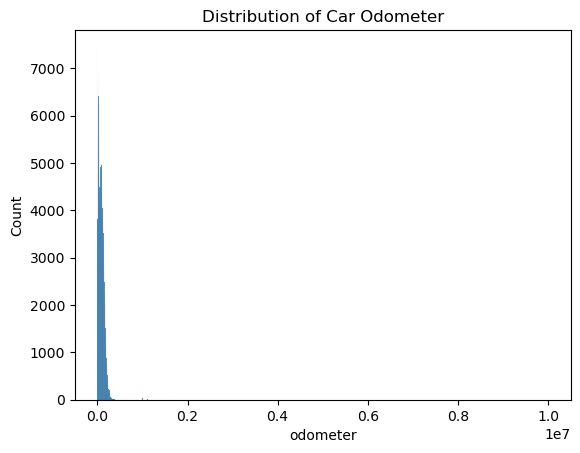

In [24]:
sns.histplot(data = cars, x = 'odometer').set(title = 'Distribution of Car Odometer')

In [25]:
cars[cars['odometer'] > 300000]

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date,age
527,birmingham,5500,2001,ford,e350 van,diesel,340000,clean,automatic,van,al,2021-04-28T06:11:19-0500,22
562,birmingham,27990,2014,ram,2500 4x4,diesel,2222222,clean,automatic,truck,al,2021-04-27T14:14:34-0500,9
615,birmingham,0,2014,ram,2500 slt 4x4,diesel,1111111,clean,automatic,truck,al,2021-04-26T12:00:10-0500,9
616,birmingham,17990,2018,ford,edge sel,gas,1111111,clean,automatic,SUV,al,2021-04-26T11:57:28-0500,5
618,birmingham,0,2018,chevrolet,silverado 3500 ltz 4x4,diesel,1111111,clean,automatic,truck,al,2021-04-26T11:52:52-0500,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424990,milwaukee,14999,2014,ford,f-450,diesel,312826,clean,other,truck,wi,2021-04-15T10:53:41-0500,9
425544,wausau,700,1998,toyota,camry xle,gas,321132,clean,automatic,sedan,wi,2021-05-04T21:13:03-0500,25
425616,wausau,5500,2006,chevrolet,silverado 1500,gas,369000,clean,automatic,pickup,wi,2021-05-03T13:29:57-0500,17
425813,wausau,900,1998,gmc,yukon xl,gas,330000,clean,automatic,SUV,wi,2021-04-25T17:31:35-0500,25


There are 1,032 cars that show that their odometer is above 300,000 miles. Since this is extremely unlikely to be true, these values will be removed so they do not negatively affect my models later on.

In [26]:
cars = cars[cars.odometer <= 300000]

In [27]:
cars.shape[0]

300573

[Text(0.5, 1.0, 'Distribution of Car Odometer')]

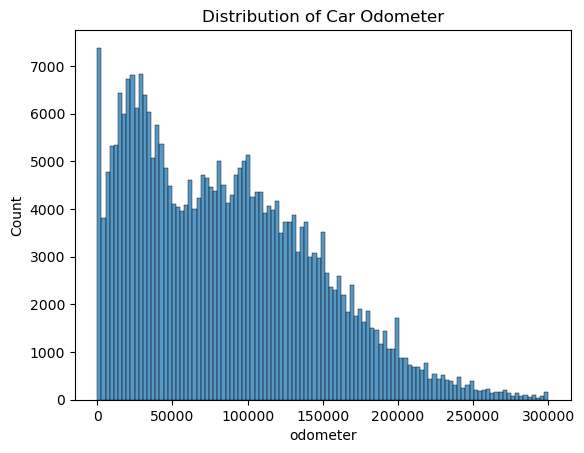

In [28]:
sns.histplot(data = cars, x = 'odometer').set(title = 'Distribution of Car Odometer')

[Text(0.5, 1.0, 'Correlation of Vehicle Odometer and List Price')]

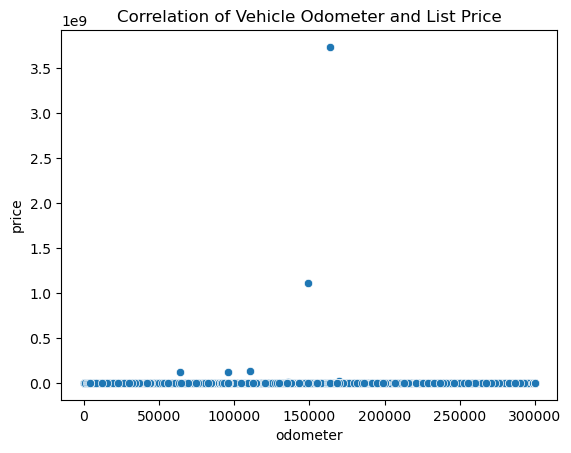

In [29]:
sns.scatterplot(data = cars, x = 'odometer', y = 'price').set(title = 'Correlation of Vehicle Odometer and List Price')

There appear to be extreme price values. I will take a closer look at these values.

In [30]:
cars[cars['price'] > 100000]

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date,age
1727,birmingham,130000,2019,chevrolet,corvette,gas,5000,clean,automatic,coupe,al,2021-04-05T22:11:19-0500,4
2922,huntsville / decatur,140000,2015,jeep,renegade,gas,49658,rebuilt,other,SUV,al,2021-04-27T09:21:39-0500,8
4826,tuscaloosa,104900,2020,bmw,m805i,gas,9000,clean,automatic,sedan,al,2021-05-03T16:16:01-0500,3
7109,anchorage / mat-su,116000,2019,ford,f350 diesels powerstroke,diesel,24000,lien,automatic,truck,ak,2021-04-14T13:11:00-0800,4
8005,fairbanks,122995,2016,nissan,gt-r,gas,9527,clean,automatic,coupe,ak,2021-04-16T07:03:07-0800,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414269,charleston,104999,2021,cadillac,escalade,gas,480,clean,automatic,SUV,wv,2021-04-04T06:15:29-0400,2
414270,charleston,104999,2021,cadillac,escalade,gas,220,clean,automatic,SUV,wv,2021-04-04T06:15:16-0400,2
419656,madison,119900,2021,chevrolet,corvette,gas,601,clean,automatic,coupe,wi,2021-05-04T18:47:19-0500,2
419756,madison,119995,2004,acura,nsx,gas,16859,clean,manual,coupe,wi,2021-05-04T07:26:45-0500,19


There are 247 cars whose list price is greater than $100,000 which will affect my models and these observations will be dropped.

In [31]:
cars = cars[cars.price <= 100000]

In [32]:
cars.shape[0]

300326

[Text(0.5, 1.0, 'Correlation of Vehicle Odometer and List Price')]

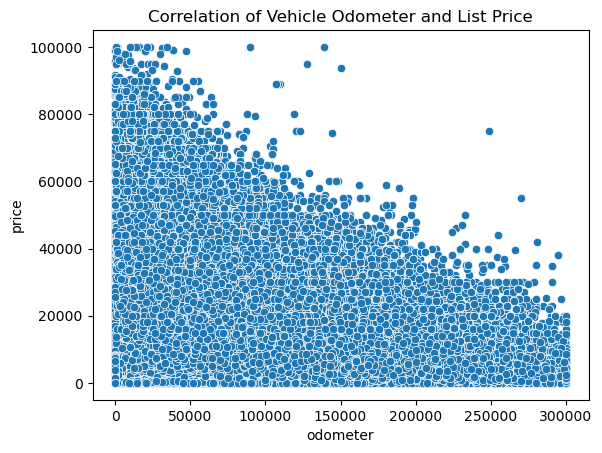

In [33]:
# look at the odometer vs price now
sns.scatterplot(data = cars, x = 'odometer', y = 'price').set(title = 'Correlation of Vehicle Odometer and List Price')

There appears to be a very weak correlation between odometer and price, which is expected.

[Text(0.5, 1.0, 'Distribution of List Price')]

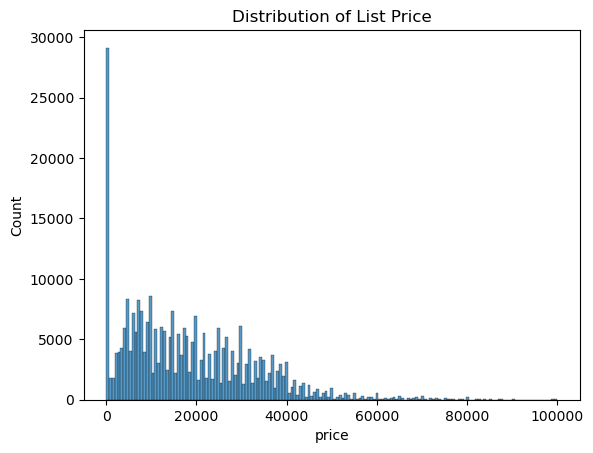

In [34]:
sns.histplot(data = cars, x = 'price').set(title = 'Distribution of List Price')

In [35]:
cars[cars['price'] < 1000]

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date,age
46,auburn,0,2011,jeep,compass,gas,99615,clean,automatic,SUV,al,2021-04-30T16:35:11-0500,12
126,auburn,0,2018,chevrolet,express cargo van,gas,68472,clean,automatic,van,al,2021-04-12T11:20:35-0500,5
127,auburn,0,2019,chevrolet,express cargo van,gas,69125,clean,automatic,van,al,2021-04-12T11:20:00-0500,4
128,auburn,0,2018,chevrolet,express cargo van,gas,66555,clean,automatic,van,al,2021-04-12T11:19:58-0500,5
191,birmingham,0,2015,nissan,sentra,gas,99505,clean,automatic,sedan,al,2021-05-04T11:00:42-0500,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426411,wyoming,0,2013,ram,1500 crew cab,gas,207206,clean,automatic,pickup,wy,2021-04-26T16:02:19-0600,10
426539,wyoming,0,2016,toyota,4runner trd pro,gas,45286,clean,automatic,SUV,wy,2021-04-20T12:58:08-0600,7
426638,wyoming,0,2015,dodge,intern,diesel,0,clean,other,other,wy,2021-04-15T10:40:07-0600,8
426744,wyoming,800,2000,cadillac,deville,gas,100000,clean,automatic,coupe,wy,2021-04-08T13:26:14-0600,23


I will drop observations where the price is less than $1,000 so it does not affect my models later on.

In [36]:
cars = cars[cars.price >= 1000]

[Text(0.5, 1.0, 'Distribution of List Price')]

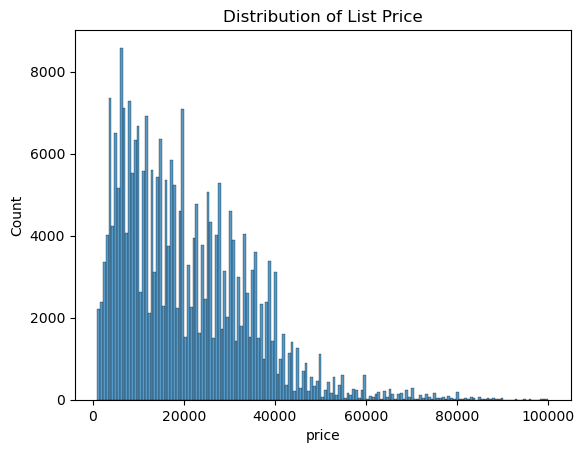

In [37]:
sns.histplot(data = cars, x = 'price').set(title = 'Distribution of List Price')

In [38]:
cars.shape[0]

270422

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'cadillac'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'lexus'),
  Text(12, 0, 'jaguar'),
  Text(13, 0, 'buick'),
  Text(14, 0, 'chrysler'),
  Text(15, 0, 'volvo'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'infiniti'),
  Text(18, 0, 'lincoln'),
  Text(19, 0, 'alfa-romeo'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'acura'),
  Text(22, 0, 'hyundai'),
  Text(23, 0, 'mercedes-benz'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'volkswagen'),
  Text(27, 0, 'porsche'),
  Text(28, 0, 'kia'),
  Text(29, 0, 'ferrari'),
  Text(30, 0, 'pontiac'),
  Text(31, 0, 'fiat'),
  Text(32, 0, 'rov

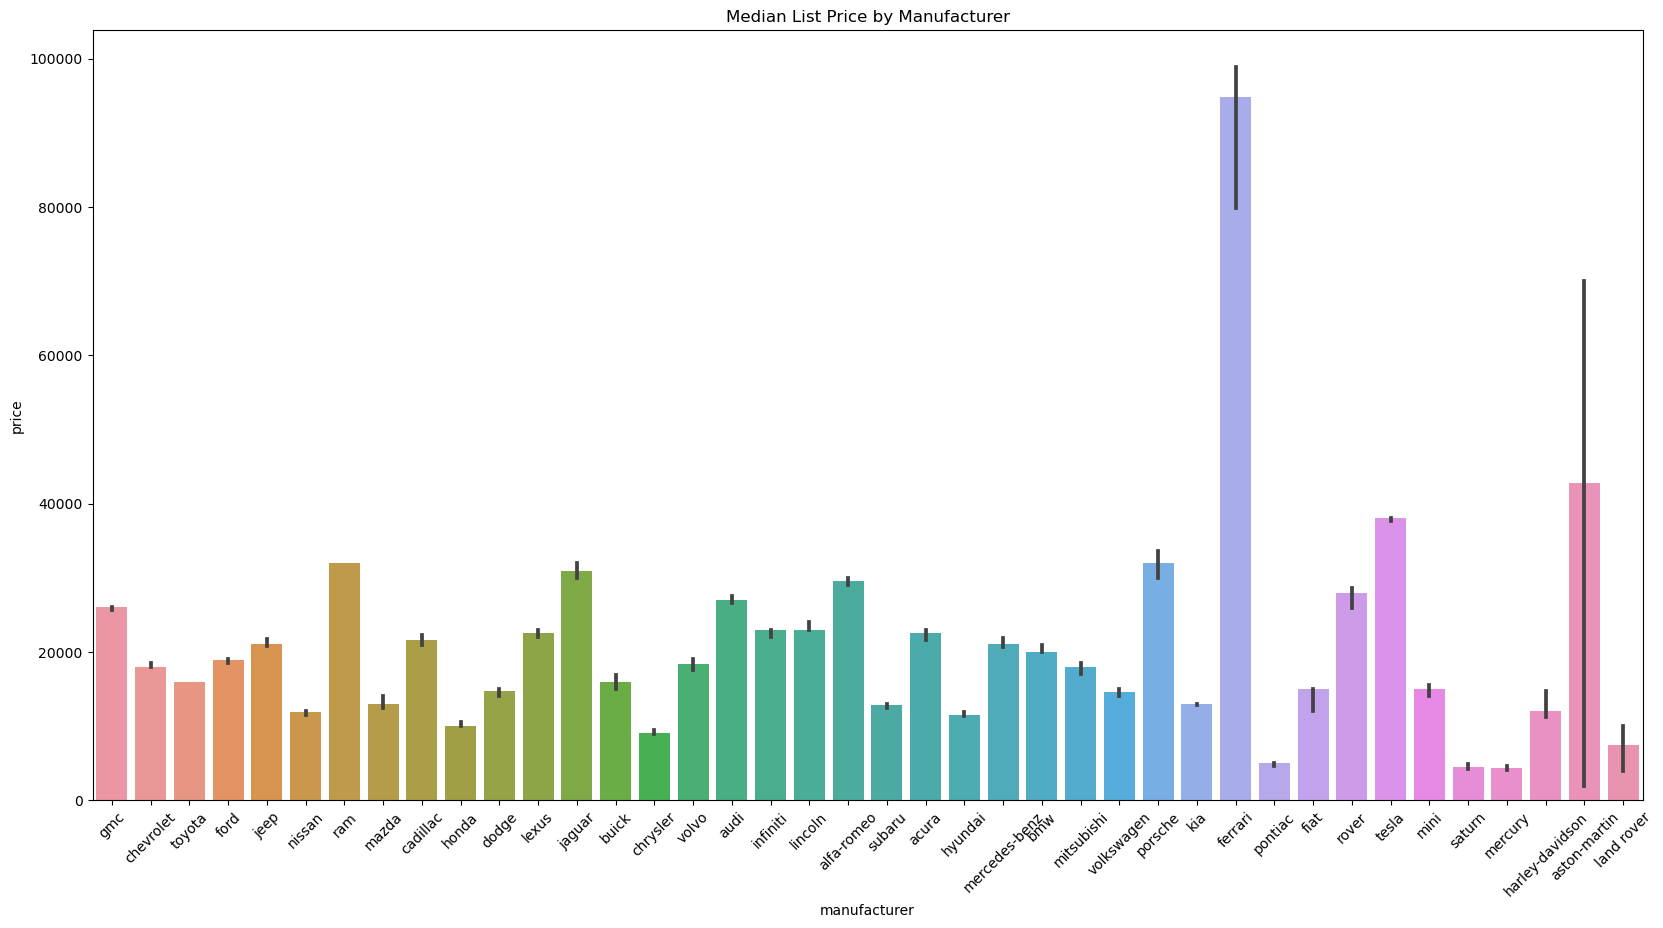

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data = cars, x = 'manufacturer', y = 'price', estimator = np.median, ax = ax).set(title = 'Median List Price by Manufacturer')
plt.xticks(rotation = 45)

In [40]:
cars.groupby(['manufacturer'])['price'].median().sort_values(ascending = False)

manufacturer
ferrari            94850.0
aston-martin       42747.5
tesla              37990.0
porsche            31990.0
ram                31990.0
jaguar             30890.5
alfa-romeo         29590.0
rover              27990.0
audi               26990.0
gmc                25990.0
lincoln            22992.5
infiniti           22990.0
acura              22500.0
lexus              22499.0
cadillac           21590.0
jeep               20995.0
mercedes-benz      20995.0
bmw                20000.0
ford               18881.0
volvo              18413.0
chevrolet          17999.0
mitsubishi         17990.0
toyota             15990.0
buick              15950.0
mini               14995.0
fiat               14990.0
dodge              14700.0
volkswagen         14587.0
mazda              12995.0
kia                12990.0
subaru             12800.0
harley-davidson    11975.0
nissan             11900.0
hyundai            11500.0
honda               9999.0
chrysler            8995.0
land rover     

In [41]:
cars['manufacturer'].value_counts()

ford               43394
chevrolet          33612
toyota             23770
honda              14752
nissan             12555
jeep               12211
ram                11379
gmc                10917
bmw                10891
dodge               8088
mercedes-benz       7568
hyundai             7058
volkswagen          6611
subaru              6599
lexus               6249
audi                6045
kia                 5681
acura               4865
cadillac            4742
chrysler            3893
mazda               3888
infiniti            3806
buick               3747
lincoln             3076
volvo               2471
mitsubishi          2395
mini                1853
jaguar              1554
rover               1318
pontiac             1127
porsche              814
alfa-romeo           783
tesla                704
mercury              685
saturn               638
fiat                 582
harley-davidson       64
ferrari               15
aston-martin          14
land rover             8


[Text(0.5, 1.0, 'List Price by Fuel Type')]

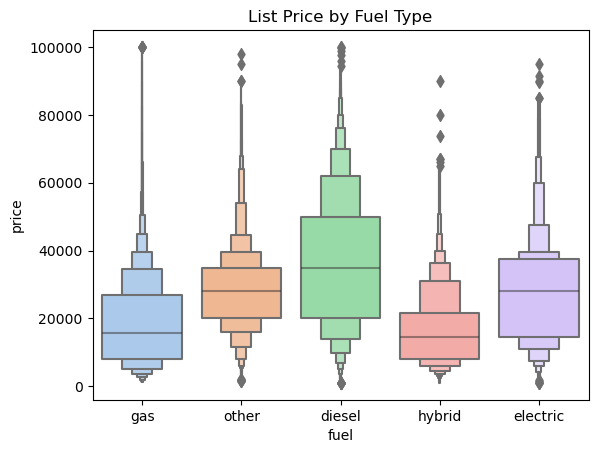

In [42]:
sns.boxenplot(data = cars, x = 'fuel', y = 'price', palette = 'pastel').set(title = 'List Price by Fuel Type')

In [43]:
cars.groupby(['fuel']).median()

C:\Users\zachk\AppData\Local\Temp\ipykernel_2164\2206219665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cars.groupby(['fuel']).median()


,price,year,odometer,age
fuel,,,,
diesel,34990.0,2014.0,105173.0,9.0
electric,28184.0,2016.0,26816.0,7.0
gas,15750.0,2014.0,85658.0,9.0
hybrid,14500.0,2014.0,74496.0,9.0
other,27990.0,2017.0,34152.0,6.0


In [44]:
cars['fuel'].value_counts()

gas         226255
other        24591
diesel       14447
hybrid        3815
electric      1314
Name: fuel, dtype: int64

[Text(0.5, 1.0, 'List Price by Title Status')]

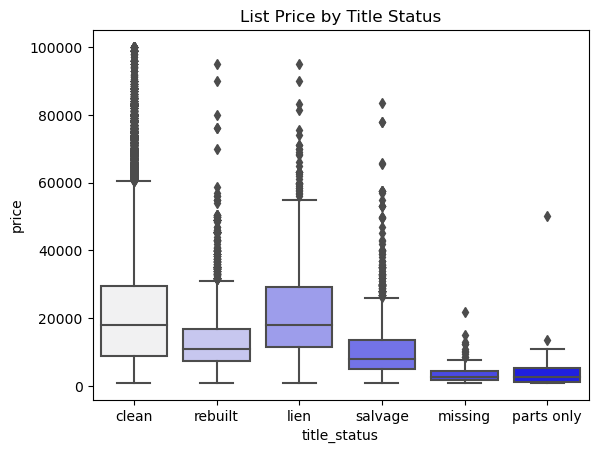

In [45]:
sns.boxplot(data = cars, x = 'title_status', y = 'price', palette = 'light:b').set(title = 'List Price by Title Status')

In [46]:
cars.groupby(['title_status']).median()

C:\Users\zachk\AppData\Local\Temp\ipykernel_2164\2631134954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cars.groupby(['title_status']).median()


,price,year,odometer,age
title_status,,,,
clean,17990.0,2014.0,80732.0,9.0
lien,18000.0,2014.0,83000.0,9.0
missing,2850.0,2003.0,145250.0,20.0
parts only,2800.0,2005.0,124000.0,18.0
rebuilt,11000.0,2014.0,72000.0,9.0
salvage,8000.0,2012.0,88000.0,11.0


[Text(0.5, 1.0, 'List Price by Transmission Type')]

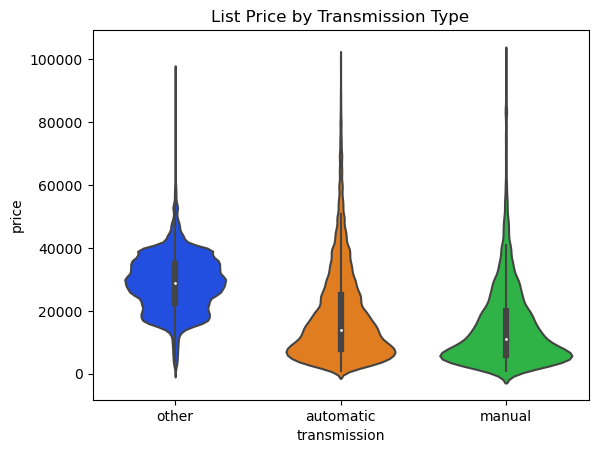

In [47]:
sns.violinplot(data = cars, x = 'transmission', y = 'price', palette = 'bright').set(title = 'List Price by Transmission Type')

In [48]:
cars['transmission'].value_counts()

automatic    201476
other         57138
manual        11808
Name: transmission, dtype: int64

In [49]:
cars[cars['transmission'] == 'manual'].median()

C:\Users\zachk\AppData\Local\Temp\ipykernel_2164\4245527998.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars[cars['transmission'] == 'manual'].median()


price        10995.0
year          2009.0
odometer    100000.0
age             14.0
dtype: float64

In [50]:
cars[cars['transmission'] == 'automatic'].median()

C:\Users\zachk\AppData\Local\Temp\ipykernel_2164\4122615313.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars[cars['transmission'] == 'automatic'].median()


price       13999.0
year         2013.0
odometer    99178.0
age            10.0
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'pickup'),
  Text(1, 0, 'truck'),
  Text(2, 0, 'other'),
  Text(3, 0, 'coupe'),
  Text(4, 0, 'SUV'),
  Text(5, 0, 'hatchback'),
  Text(6, 0, 'mini-van'),
  Text(7, 0, 'sedan'),
  Text(8, 0, 'offroad'),
  Text(9, 0, 'convertible'),
  Text(10, 0, 'wagon'),
  Text(11, 0, 'van'),
  Text(12, 0, 'bus')])

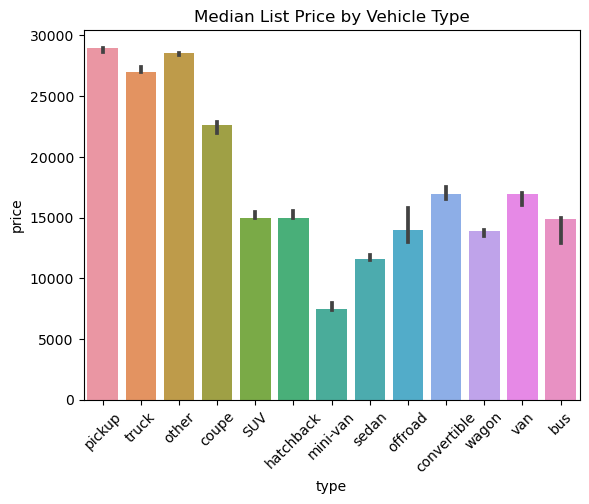

In [51]:
sns.barplot(data = cars, x = 'type', y = 'price', estimator = np.median).set(title = 'Median List Price by Vehicle Type')
plt.xticks(rotation=45)

In [52]:
cars.groupby(['type']).median()

C:\Users\zachk\AppData\Local\Temp\ipykernel_2164\3720106740.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cars.groupby(['type']).median()


,price,year,odometer,age
type,,,,
SUV,15000.0,2014.0,96322.5,9.0
bus,14900.0,2011.0,125221.5,12.0
convertible,16950.0,2008.0,63800.0,15.0
coupe,22590.0,2014.0,50293.0,9.0
hatchback,14995.0,2015.0,51513.0,8.0
mini-van,7500.0,2010.0,129400.0,13.0
offroad,14000.0,2007.0,120000.0,16.0
other,28590.0,2017.0,37509.0,6.0
pickup,28990.0,2015.0,68696.0,8.0


In [53]:
cars['type'].value_counts()

sedan          71641
SUV            62852
pickup         37849
truck          25716
other          17635
coupe          14353
hatchback      13953
wagon           9107
van             6707
convertible     5749
mini-van        4203
offroad          421
bus              236
Name: type, dtype: int64

In [54]:
cars['state'].value_counts()

ca    31052
fl    18878
tx    14616
ny    13231
oh    11983
pa     9529
or     9176
nc     8584
wa     8547
mi     8523
wi     7537
co     7398
tn     7261
va     6876
nj     6264
id     6248
il     6030
az     5983
ma     5794
ia     4967
mn     4790
ga     4754
mt     4283
ks     4097
in     3970
sc     3784
ok     3641
ct     3622
md     3379
ky     3178
al     3110
ak     2908
mo     2780
nm     2482
nv     2234
dc     2137
nh     1985
ar     1917
la     1770
vt     1718
me     1556
ri     1485
hi     1484
ut      850
wv      803
sd      739
ne      622
de      594
ms      561
wy      406
nd      306
Name: state, dtype: int64

In [55]:
cars['state'] = cars['state'].str.upper()

In [56]:
cars[cars['state'] == 'WV']['type'].value_counts()

pickup         193
truck          139
sedan          127
SUV            109
coupe           89
other           64
hatchback       25
van             22
convertible     20
wagon           12
mini-van         3
Name: type, dtype: int64

In [57]:
cars[cars['state'] == 'WA']['type'].value_counts()

SUV            2650
truck          2622
sedan          1473
pickup          542
hatchback       289
wagon           271
coupe           251
convertible     128
other           118
van             110
mini-van         81
offroad           9
bus               3
Name: type, dtype: int64

In [58]:
cars[cars['state'] == 'AK']['type'].value_counts()

SUV            920
sedan          735
truck          430
pickup         362
wagon          138
hatchback       69
coupe           65
mini-van        64
van             46
other           45
convertible     22
offroad         11
bus              1
Name: type, dtype: int64

In [59]:
cars[cars['state'] == 'MT']['type'].value_counts()

SUV            1347
truck          1275
sedan           839
pickup          269
wagon           189
coupe           143
van              72
hatchback        69
convertible      29
mini-van         24
other            19
offroad           6
bus               2
Name: type, dtype: int64

In [60]:
cars[cars['state'] == 'NJ']['type'].value_counts()

sedan          2024
SUV            1585
other           587
pickup          521
coupe           355
truck           290
hatchback       237
wagon           205
van             177
convertible     148
mini-van        122
bus              10
offroad           3
Name: type, dtype: int64

In [61]:
cars[cars['state'] == 'IA']['type'].value_counts()

SUV            1344
sedan          1338
truck           700
pickup          544
hatchback       201
coupe           181
other           143
convertible     129
wagon           128
mini-van        125
van             125
bus               5
offroad           4
Name: type, dtype: int64

## Modeling

### Segmentation

In [62]:
cars.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,posting_date,age
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,gas,57923,clean,other,pickup,AL,2021-05-04T12:31:18-0500,9
28,auburn,22590,2010,chevrolet,silverado 1500,gas,71229,clean,other,pickup,AL,2021-05-04T12:31:08-0500,13
29,auburn,39590,2020,chevrolet,silverado 1500 crew,gas,19160,clean,other,pickup,AL,2021-05-04T12:31:25-0500,3
30,auburn,30990,2017,toyota,tundra double cab sr,gas,41124,clean,other,pickup,AL,2021-05-04T10:41:31-0500,6
31,auburn,15000,2013,ford,f-150 xlt,gas,128000,clean,automatic,truck,AL,2021-05-03T14:02:03-0500,10


In [63]:
cars = cars.drop(columns = ['year', 'posting_date', 'model', 'region'])

In [64]:
west = ['WA', 'AK', 'OR', 'CA', 'HI', 'MT', 'ID', 'WY', 'CO', 'UT', 'NV', 'AZ', 'NM']
midwest = ['ND', 'MN', 'SD', 'IA', 'KS', 'MO', 'NE', 'WI', 'MI', 'IL', 'IN', 'OH']
south = ['OK', 'AR', 'TX', 'LA', 'KY', 'TN', 'MS', 'AL', 'WV', 'DC', 'MD', 'DE', 'VA', 'NC', 'SC', 'GA', 'FL']
northeast = ['NY', 'PA', 'NJ', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']

cars['region'] = np.where(cars['state'].isin(west), 'West',
                 np.where(cars['state'].isin(midwest), 'Midwest',
                 np.where(cars['state'].isin(south), 'South', 'Northeast')))

In [65]:
cars.head()

,price,manufacturer,fuel,odometer,title_status,transmission,type,state,age,region
27,33590,gmc,gas,57923,clean,other,pickup,AL,9,South
28,22590,chevrolet,gas,71229,clean,other,pickup,AL,13,South
29,39590,chevrolet,gas,19160,clean,other,pickup,AL,3,South
30,30990,toyota,gas,41124,clean,other,pickup,AL,6,South
31,15000,ford,gas,128000,clean,automatic,truck,AL,10,South


In [66]:
cars['region'].value_counts()

South        85843
West         83051
Midwest      56344
Northeast    45184
Name: region, dtype: int64

In [67]:
cars = cars.drop(columns = ['state'])

In [68]:
west = cars[cars['region'] == 'West'].copy()
south = cars[cars['region'] == 'South'].copy()
midwest = cars[cars['region'] == 'Midwest'].copy()
northeast = cars[cars['region'] == 'Northeast'].copy()

In [69]:
west = west.drop(columns = ['region'])
south = south.drop(columns = ['region'])
midwest = midwest.drop(columns = ['region'])
northeast = northeast.drop(columns = ['region'])

In [70]:
west = pd.get_dummies(west)
midwest = pd.get_dummies(midwest)
south = pd.get_dummies(south)
northeast = pd.get_dummies(northeast)

### Model Building

#### Multiple Regression

West Region

In [71]:
X = west.iloc[:,1:]
y = west.iloc[:,0]

In [72]:
X1train, X1test, y1train, y1test = train_test_split(X,y, random_state=123,test_size=.2)

mod1 = LinearRegression()
mod1.fit(X1train,y1train)

LinearRegression()

In [73]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     3321.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:47   Log-Likelihood:            -8.6560e+05
No. Observations:               83051   AIC:                         1.731e+06
Df Residuals:                   82986   BIC:                         1.732e+06
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
odometer        

In [74]:
#find predictions of price for X-values in the trained data
y1train_hat = mod1.predict(X1train)

#find predictions of price for X-values in the test data
y1test_hat = mod1.predict(X1test)

In [75]:
rmse1_train = np.sqrt(np.mean(np.power(y1train_hat-y1train, 2)))

print('rmse1_train:', rmse1_train)

rmse1_test = np.sqrt(np.mean(np.power(y1test_hat-y1test, 2)))

print('rmse1_test: ', rmse1_test)

print('accuracy: ', mod1.score(X1test, y1test))

rmse1_train: 8138.377084386021
rmse1_test:  8117.995596078253
accuracy:  0.717726072962477


Text(0, 0.5, 'yhat')

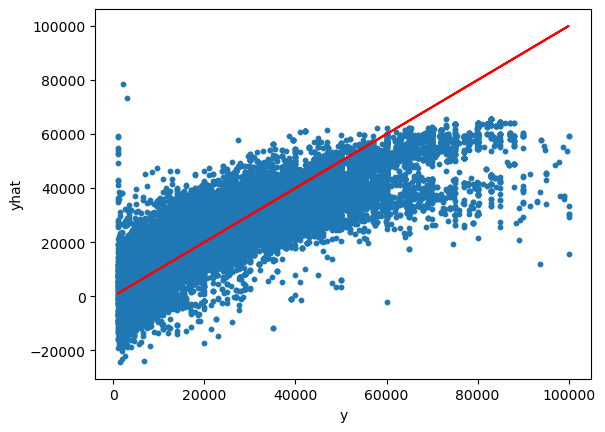

In [76]:
plt.scatter(y1train,y1train_hat,s=10) 
plt.plot(y,y,c='red') #add the identity line
plt.xlabel("y"); plt.ylabel("yhat")

Midwest Region

In [77]:
X = midwest.iloc[:,1:]
y = midwest.iloc[:,0]

X1train, X1test, y1train, y1test = train_test_split(X,y, random_state=123,test_size=.2)

mod1 = LinearRegression()
mod1.fit(X1train,y1train)

LinearRegression()

In [78]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2267.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:48   Log-Likelihood:            -5.7876e+05
No. Observations:               56344   AIC:                         1.158e+06
Df Residuals:                   56280   BIC:                         1.158e+06
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
odometer        

In [79]:
#find predictions of price for X-values in the trained data
y1train_hat = mod1.predict(X1train)

#find predictions of price for X-values in the test data
y1test_hat = mod1.predict(X1test)

rmse1_train = np.sqrt(np.mean(np.power(y1train_hat-y1train, 2)))

print('rmse1_train:', rmse1_train)

rmse1_test = np.sqrt(np.mean(np.power(y1test_hat-y1test, 2)))

print('rmse1_test: ', rmse1_test)

print('accuracy: ', mod1.score(X1test, y1test))

rmse1_train: 7016.685017718332
rmse1_test:  6912.212607162372
accuracy:  0.7190129006130281


Text(0, 0.5, 'yhat')

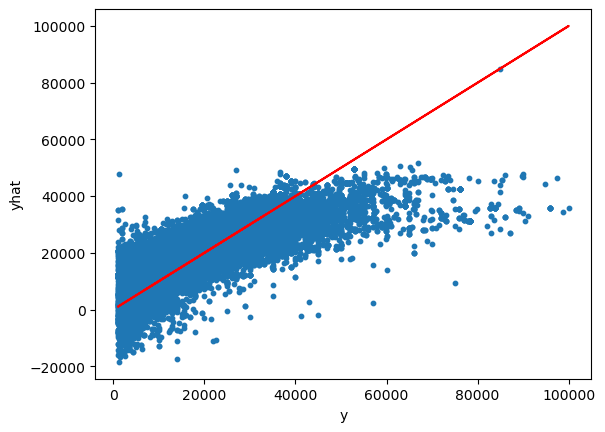

In [80]:
plt.scatter(y1train,y1train_hat,s=10) 
plt.plot(y,y,c='red') #add the identity line
plt.xlabel("y"); plt.ylabel("yhat")

South Region

In [81]:
X = south.iloc[:,1:]
y = south.iloc[:,0]

X1train, X1test, y1train, y1test = train_test_split(X,y, random_state=123,test_size=.2)

mod1 = LinearRegression()
mod1.fit(X1train,y1train)

LinearRegression()

In [82]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3008.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:49   Log-Likelihood:            -8.8781e+05
No. Observations:               85843   AIC:                         1.776e+06
Df Residuals:                   85779   BIC:                         1.776e+06
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
odometer        

In [83]:
#find predictions of price for X-values in the trained data
y1train_hat = mod1.predict(X1train)

#find predictions of price for X-values in the test data
y1test_hat = mod1.predict(X1test)

rmse1_train = np.sqrt(np.mean(np.power(y1train_hat-y1train, 2)))

print('rmse1_train:', rmse1_train)

rmse1_test = np.sqrt(np.mean(np.power(y1test_hat-y1test, 2)))

print('rmse1_test: ', rmse1_test)

print('accuracy: ', mod1.score(X1test, y1test))

rmse1_train: 7499.8663580770135
rmse1_test:  7527.290648608516
accuracy:  0.6851084825644587


Text(0, 0.5, 'yhat')

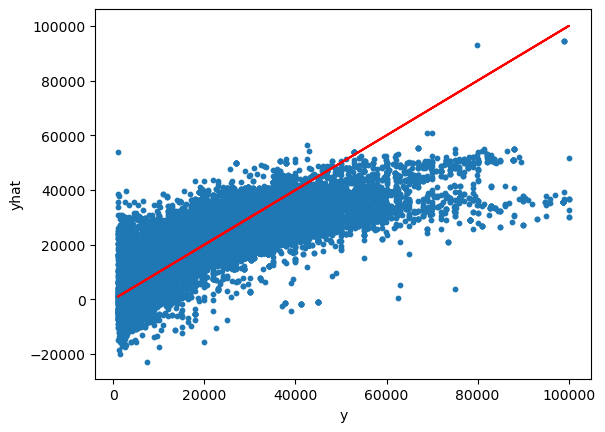

In [84]:
plt.scatter(y1train,y1train_hat,s=10) 
plt.plot(y,y,c='red') #add the identity line
plt.xlabel("y"); plt.ylabel("yhat")

Northeast Region

In [85]:
X = northeast.iloc[:,1:]
y = northeast.iloc[:,0]

X1train, X1test, y1train, y1test = train_test_split(X,y, random_state=123,test_size=.2)

mod1 = LinearRegression()
mod1.fit(X1train,y1train)

LinearRegression()

In [86]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1967.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:50   Log-Likelihood:            -4.6147e+05
No. Observations:               45184   AIC:                         9.231e+05
Df Residuals:                   45120   BIC:                         9.236e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
odometer        

In [87]:
#find predictions of price for X-values in the trained data
y1train_hat = mod1.predict(X1train)

#find predictions of price for X-values in the test data
y1test_hat = mod1.predict(X1test)

rmse1_train = np.sqrt(np.mean(np.power(y1train_hat-y1train, 2)))

print('rmse1_train:', rmse1_train)

rmse1_test = np.sqrt(np.mean(np.power(y1test_hat-y1test, 2)))

print('rmse1_test: ', rmse1_test)

print('accuracy: ', mod1.score(X1test, y1test))

rmse1_train: 6577.68203641962
rmse1_test:  6673.4770747916045
accuracy:  0.7275637349600208


Text(0, 0.5, 'yhat')

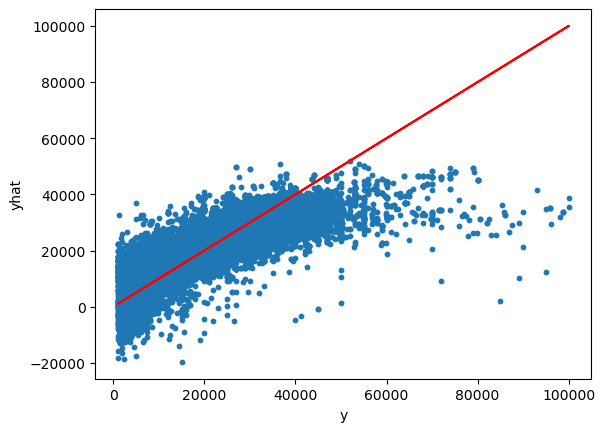

In [88]:
plt.scatter(y1train,y1train_hat,s=10) 
plt.plot(y,y,c='red') #add the identity line
plt.xlabel("y"); plt.ylabel("yhat")

Total US

In [89]:
cars = pd.get_dummies(cars)

In [90]:
X = cars.iloc[:,1:]
y = cars.iloc[:,0]

X1train, X1test, y1train, y1test = train_test_split(X,y, random_state=123,test_size=.2)

mod1 = LinearRegression()
mod1.fit(X1train,y1train)

LinearRegression()

In [91]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     9661.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:54   Log-Likelihood:            -2.7998e+06
No. Observations:              270422   AIC:                         5.600e+06
Df Residuals:                  270354   BIC:                         5.600e+06
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
odometer        

In [92]:
#find predictions of price for X-values in the trained data
y1train_hat = mod1.predict(X1train)

#find predictions of price for X-values in the test data
y1test_hat = mod1.predict(X1test)

rmse1_train = np.sqrt(np.mean(np.power(y1train_hat-y1train, 2)))

print('rmse1_train:', rmse1_train)

rmse1_test = np.sqrt(np.mean(np.power(y1test_hat-y1test, 2)))

print('rmse1_test: ', rmse1_test)

print('accuracy: ', mod1.score(X1test, y1test))

rmse1_train: 7584.695290691971
rmse1_test:  7611.983745673819
accuracy:  0.7039946750263346


Text(0, 0.5, 'yhat')

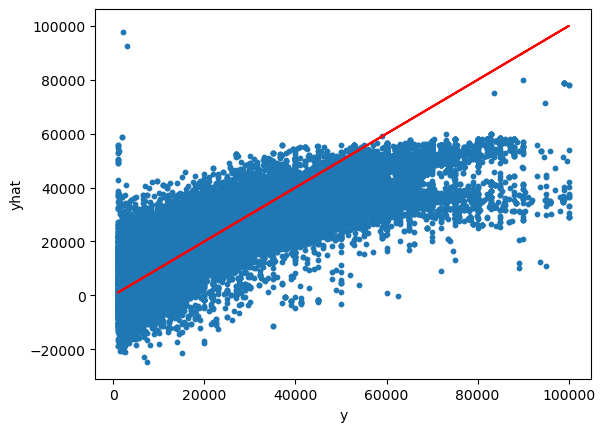

In [93]:
plt.scatter(y1train,y1train_hat,s=10) 
plt.plot(y,y,c='red') #add the identity line
plt.xlabel("y"); plt.ylabel("yhat")

#### Random Forest

West Region

In [94]:
features = pd.get_dummies(west)

labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [95]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [96]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [97]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the root mean squared error (rmse)
mse = mean_squared_error(test_labels, predictions)
print('RMSE:', round(np.mean(errors), 2))

RMSE: 2324.81


In [98]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.51 %.


In [99]:
importances = list(rf.feature_importances_)

In [100]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.41
Variable: odometer             Importance: 0.16
Variable: fuel_diesel          Importance: 0.15
Variable: type_sedan           Importance: 0.05
Variable: type_pickup          Importance: 0.03
Variable: type_truck           Importance: 0.03
Variable: type_hatchback       Importance: 0.02
Variable: manufacturer_chevrolet Importance: 0.01
Variable: manufacturer_ford    Importance: 0.01
Variable: manufacturer_mercedes-benz Importance: 0.01
Variable: manufacturer_porsche Importance: 0.01
Variable: manufacturer_toyota  Importance: 0.01
Variable: manufacturer_volkswagen Importance: 0.01
Variable: fuel_gas             Importance: 0.01
Variable: fuel_other           Importance: 0.01
Variable: transmission_automatic Importance: 0.01
Variable: transmission_other   Importance: 0.01
Variable: type_SUV             Importance: 0.01
Variable: manufacturer_acura   Importance: 0.0
Variable: manufacturer_alfa-romeo Importance: 0.0
Variable: manufacturer_ast

Midwest Region

In [101]:
features = pd.get_dummies(midwest)

labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [102]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [103]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [104]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the root mean squared error (rmse)
mse = mean_squared_error(test_labels, predictions)
print('RMSE:', round(np.mean(errors), 2))

RMSE: 1945.66


In [105]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.95 %.


In [106]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.48
Variable: odometer             Importance: 0.19
Variable: fuel_diesel          Importance: 0.03
Variable: transmission_other   Importance: 0.03
Variable: type_pickup          Importance: 0.03
Variable: type_truck           Importance: 0.03
Variable: manufacturer_chevrolet Importance: 0.02
Variable: type_sedan           Importance: 0.02
Variable: manufacturer_audi    Importance: 0.01
Variable: manufacturer_bmw     Importance: 0.01
Variable: manufacturer_ford    Importance: 0.01
Variable: manufacturer_kia     Importance: 0.01
Variable: manufacturer_mercedes-benz Importance: 0.01
Variable: title_status_clean   Importance: 0.01
Variable: transmission_automatic Importance: 0.01
Variable: type_SUV             Importance: 0.01
Variable: type_convertible     Importance: 0.01
Variable: type_hatchback       Importance: 0.01
Variable: type_other           Importance: 0.01
Variable: manufacturer_acura   Importance: 0.0
Variable: manufacturer_alfa-rom

South Region

In [107]:
features = pd.get_dummies(south)

labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [108]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the root mean squared error (rmse)
mse = mean_squared_error(test_labels, predictions)
print('RMSE:', round(np.mean(errors), 2))

RMSE: 2036.69


In [109]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.29 %.


In [110]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.45
Variable: odometer             Importance: 0.18
Variable: fuel_diesel          Importance: 0.06
Variable: type_pickup          Importance: 0.03
Variable: type_sedan           Importance: 0.03
Variable: type_truck           Importance: 0.02
Variable: manufacturer_audi    Importance: 0.01
Variable: manufacturer_bmw     Importance: 0.01
Variable: manufacturer_chevrolet Importance: 0.01
Variable: manufacturer_dodge   Importance: 0.01
Variable: manufacturer_ford    Importance: 0.01
Variable: manufacturer_kia     Importance: 0.01
Variable: manufacturer_lexus   Importance: 0.01
Variable: manufacturer_mercedes-benz Importance: 0.01
Variable: fuel_gas             Importance: 0.01
Variable: fuel_other           Importance: 0.01
Variable: transmission_automatic Importance: 0.01
Variable: transmission_other   Importance: 0.01
Variable: type_SUV             Importance: 0.01
Variable: type_coupe           Importance: 0.01
Variable: type_hatchback      

Northeast

In [111]:
features = pd.get_dummies(northeast)

labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [112]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the root mean squared error (rmse)
mse = mean_squared_error(test_labels, predictions)
print('RMSE:', round(np.mean(errors), 2))

RMSE: 1796.56


In [113]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.44 %.


In [114]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.5
Variable: odometer             Importance: 0.17
Variable: fuel_diesel          Importance: 0.05
Variable: type_pickup          Importance: 0.04
Variable: transmission_other   Importance: 0.02
Variable: type_sedan           Importance: 0.02
Variable: type_truck           Importance: 0.02
Variable: manufacturer_audi    Importance: 0.01
Variable: manufacturer_bmw     Importance: 0.01
Variable: manufacturer_chevrolet Importance: 0.01
Variable: manufacturer_ford    Importance: 0.01
Variable: manufacturer_hyundai Importance: 0.01
Variable: manufacturer_lexus   Importance: 0.01
Variable: manufacturer_mercedes-benz Importance: 0.01
Variable: manufacturer_nissan  Importance: 0.01
Variable: fuel_gas             Importance: 0.01
Variable: title_status_clean   Importance: 0.01
Variable: transmission_automatic Importance: 0.01
Variable: type_SUV             Importance: 0.01
Variable: type_coupe           Importance: 0.01
Variable: type_hatchback       

Total US

In [115]:
features = pd.get_dummies(cars)

labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [116]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the root mean squared error (rmse)
mse = mean_squared_error(test_labels, predictions)
print('RMSE:', round(np.mean(errors), 2))

RMSE: 1902.81


In [117]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.47 %.


In [118]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.46
Variable: odometer             Importance: 0.16
Variable: fuel_diesel          Importance: 0.08
Variable: type_sedan           Importance: 0.04
Variable: type_pickup          Importance: 0.03
Variable: type_hatchback       Importance: 0.02
Variable: type_truck           Importance: 0.02
Variable: manufacturer_audi    Importance: 0.01
Variable: manufacturer_bmw     Importance: 0.01
Variable: manufacturer_chevrolet Importance: 0.01
Variable: manufacturer_ford    Importance: 0.01
Variable: manufacturer_lexus   Importance: 0.01
Variable: manufacturer_mercedes-benz Importance: 0.01
Variable: transmission_automatic Importance: 0.01
Variable: transmission_other   Importance: 0.01
Variable: type_SUV             Importance: 0.01
Variable: region_West          Importance: 0.01
Variable: manufacturer_acura   Importance: 0.0
Variable: manufacturer_alfa-romeo Importance: 0.0
Variable: manufacturer_aston-martin Importance: 0.0
Variable: manufacturer_bu

#### k-Nearest Neighbor

West Region

In [119]:
X = west.iloc[:,1:]
y = west.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn import metrics

mean_acc = np.zeros(40)
for i in range(1,40):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.51905364, 0.44223707, 0.40087894, 0.37535368, 0.35133345,
       0.33062429, 0.31154055, 0.29348022, 0.27806875, 0.2640419 ,
       0.2530251 , 0.24417555, 0.23490458, 0.22743965, 0.21991451,
       0.21178737, 0.20528565, 0.20004816, 0.19318524, 0.18860996,
       0.1855999 , 0.1798808 , 0.17620854, 0.17151285, 0.168563  ,
       0.16579375, 0.16200108, 0.15826862, 0.15592078, 0.15230871,
       0.14972007, 0.14773343, 0.14568659, 0.14400096, 0.14183372,
       0.13942568, 0.13810126, 0.13647583, 0.13521161, 0.        ])

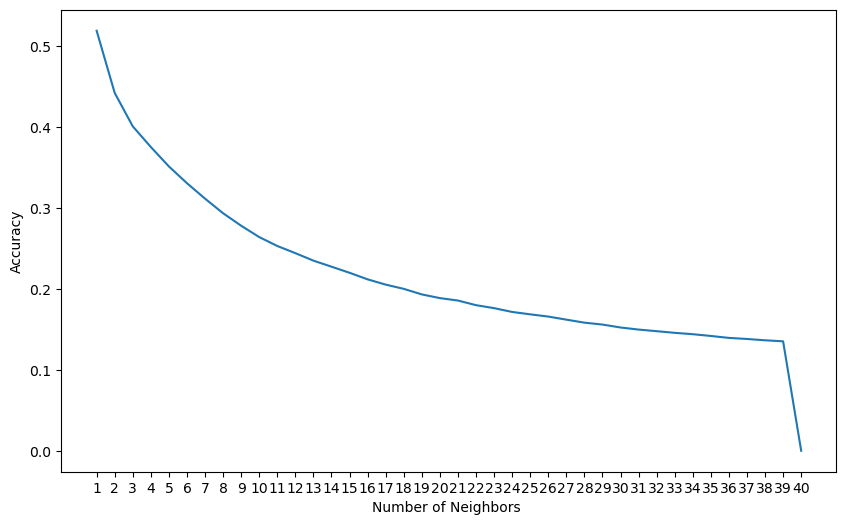

In [120]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [121]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [122]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [123]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.979003612281758
Test set accuracy:  0.519053639154777


In [124]:
mse = mean_squared_error(y_test, y_knn)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 9721.308735689116


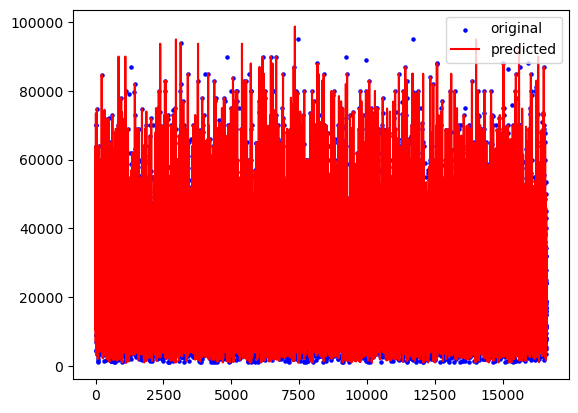

In [125]:
x_ax=range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_knn, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

Midwest Region

In [126]:
X = midwest.iloc[:,1:]
y = midwest.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn import metrics

mean_acc = np.zeros(40)
for i in range(1,40):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.50687727, 0.43384506, 0.39790576, 0.37297009, 0.35548851,
       0.33907179, 0.32451859, 0.31333747, 0.30189014, 0.29345993,
       0.28458603, 0.27722069, 0.2710977 , 0.26417606, 0.25707694,
       0.25184133, 0.24678321, 0.24128139, 0.23604579, 0.23276245,
       0.22939036, 0.22655071, 0.22202502, 0.21847546, 0.21572455,
       0.21279617, 0.20844795, 0.2064957 , 0.20347857, 0.19966279,
       0.19806549, 0.19611323, 0.19327358, 0.18892537, 0.18528707,
       0.18218121, 0.17978525, 0.17783299, 0.17543704, 0.        ])

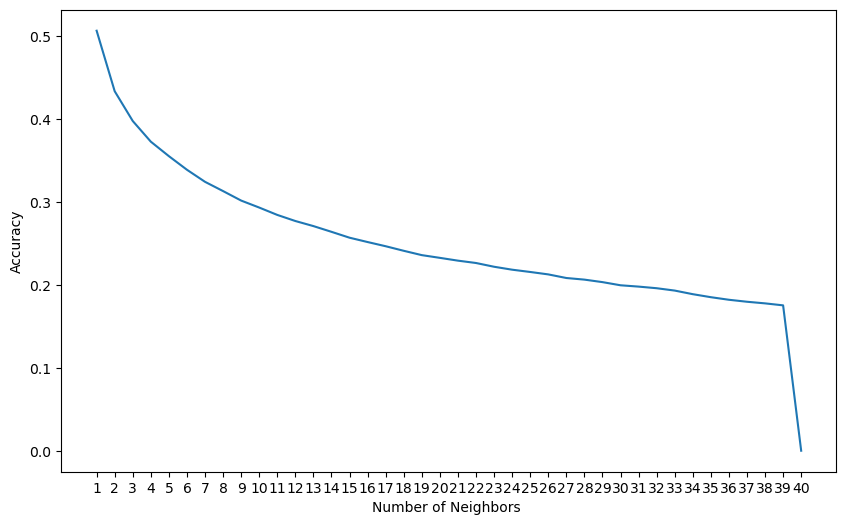

In [127]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [128]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
mse = mean_squared_error(y_test, y_knn)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Training set accuracy:  0.979212423738214
Test set accuracy:  0.5068772739373503
Root Mean Squared Error: 7904.978447165767


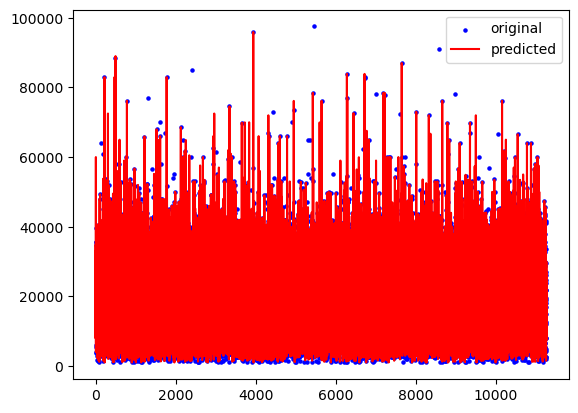

In [129]:
x_ax=range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_knn, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

South Region

In [130]:
X = south.iloc[:,1:]
y = south.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn import metrics

mean_acc = np.zeros(40)
for i in range(1,40):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.54982818, 0.48832198, 0.4604811 , 0.44178461, 0.42308812,
       0.40782806, 0.39268449, 0.38086085, 0.37002737, 0.35791252,
       0.34946706, 0.34137108, 0.33467296, 0.32814957, 0.32104374,
       0.31370493, 0.30747277, 0.30252199, 0.29815365, 0.29326111,
       0.28813559, 0.28318481, 0.27951541, 0.27538005, 0.27235133,
       0.26862368, 0.26518726, 0.26343992, 0.25790669, 0.25458676,
       0.25039315, 0.24573359, 0.24223892, 0.24025861, 0.23781234,
       0.23420118, 0.23093948, 0.23012406, 0.22645466, 0.        ])

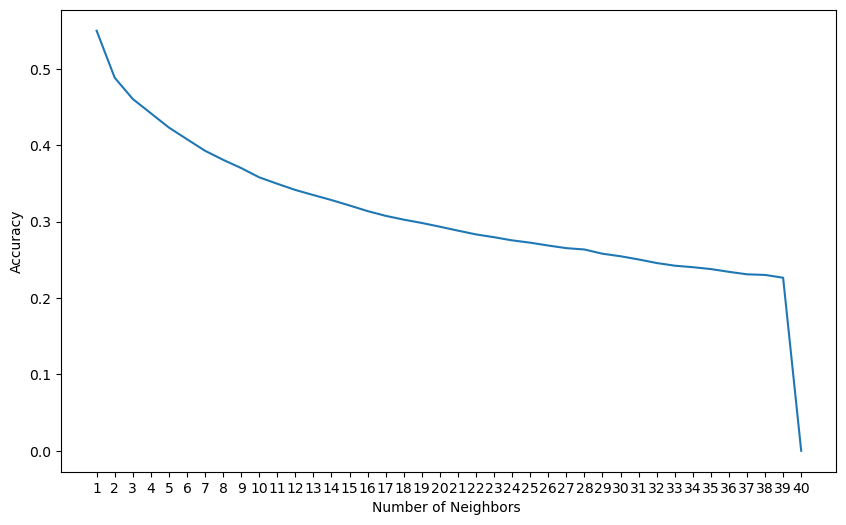

In [131]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [132]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
mse = mean_squared_error(y_test, y_knn)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Training set accuracy:  0.9781139878265428
Test set accuracy:  0.5498281786941581
Root Mean Squared Error: 8256.95686426529


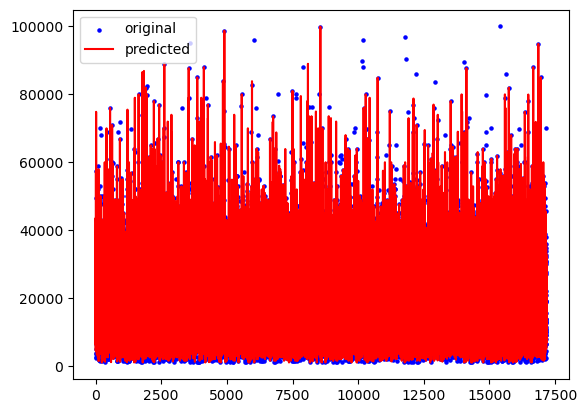

In [133]:
x_ax=range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_knn, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

Northeast Region

In [134]:
X = northeast.iloc[:,1:]
y = northeast.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn import metrics

mean_acc = np.zeros(40)
for i in range(1,40):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.56036295, 0.49098152, 0.4549076 , 0.43144849, 0.40998119,
       0.38962045, 0.37313268, 0.35531703, 0.34148501, 0.32842758,
       0.3144849 , 0.30507912, 0.29534137, 0.28715282, 0.27675113,
       0.26778798, 0.26070599, 0.2563904 , 0.25174284, 0.24543543,
       0.24034525, 0.23558703, 0.22927963, 0.22441076, 0.22219763,
       0.21788204, 0.21223857, 0.20748036, 0.20416067, 0.20128361,
       0.19829589, 0.19597211, 0.19043931, 0.18689831, 0.18402125,
       0.1813655 , 0.17870975, 0.17527941, 0.17306628, 0.        ])

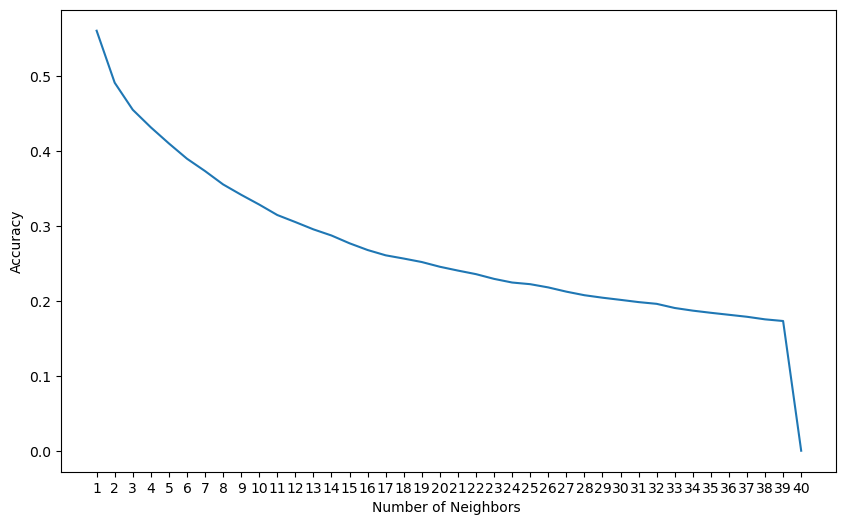

In [135]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [136]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
mse = mean_squared_error(y_test, y_knn)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Training set accuracy:  0.9833734473123634
Test set accuracy:  0.5603629523071816
Root Mean Squared Error: 7120.705106659093


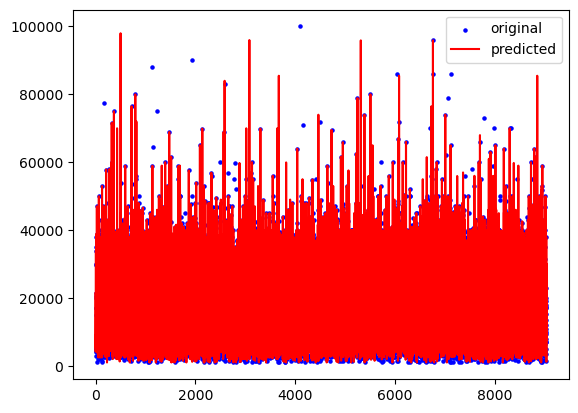

In [137]:
x_ax=range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_knn, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

Total US

In [138]:
X = cars.iloc[:,1:]
y = cars.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn import metrics

mean_acc = np.zeros(40)
for i in range(1,40):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.55595821, 0.49440695, 0.46439863, 0.44213738, 0.42447999,
       0.40811685, 0.39389849, 0.37925488, 0.36703337, 0.35571785,
       0.34636221, 0.3374688 , 0.32957382, 0.32280669, 0.31620597,
       0.30997504, 0.30403994, 0.29895535, 0.29388925, 0.28921143,
       0.28538412, 0.28153832, 0.27806231, 0.27436443, 0.27079597,
       0.26761579, 0.26402884, 0.26036794, 0.25774244, 0.25530184,
       0.25249145, 0.24979199, 0.24759175, 0.2450587 , 0.24274753,
       0.2405288 , 0.23866137, 0.23653508, 0.23439031, 0.        ])

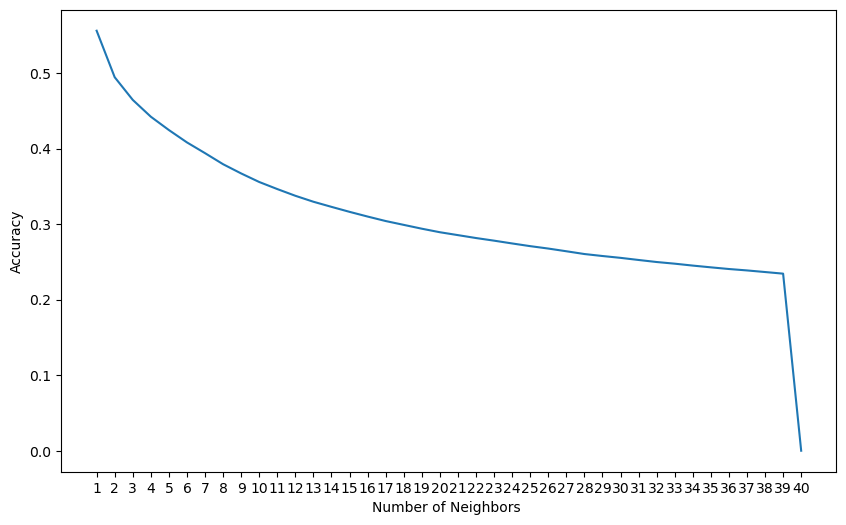

In [139]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [140]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
mse = mean_squared_error(y_test, y_knn)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Training set accuracy:  0.9794857097953655
Test set accuracy:  0.5559582139225293
Root Mean Squared Error: 7863.757764902258


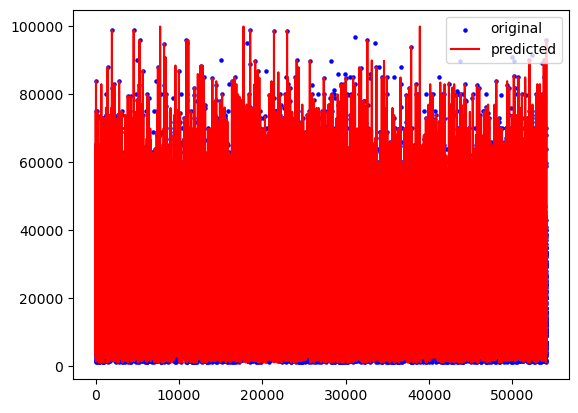

In [141]:
x_ax=range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_knn, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()